# IMEC2201 Herramientas Computacionales 
## Semana 7: Ecuación Diferencial Ordinaria (ODE)
### Clase 13:  ODE

Universidad de los Andes — Mayo 16, 2022.

---

## TABLA DE CONTENIDO

### Sección 1: ODE [→](#section1)
- 1.1. Introducción
- 1.2. Cargar Librerías
- 1.3. Sintaxis
- 1.4. Ejemplo 1
- 1.5. Ejemplo 2
- 1.6. Ejemplo 3
- 1.7. Ejemplo 4
- 1.8. Ejemplo 5
- 1.9. Ejemplo 6
- 1.10. Ejemplo 7
___

**¡Importante!** Note que la carpeta **week7** contiene dos archivos: `Project.toml` y `Manifest.toml`. Estos configuran el <font color="#FF5733">*ambiente de trabajo*</font> y facilitan el manejo de <font color="#FF5733">librerías</font>.

Para inicializar el ambiente desde Julia REPL, dentro de la carpeta **week7**, ejecute lo siguiente:

```shell
$ (v1.7) pkg > activate .
$ (week7) pkg> instantiate
```

**Nota:** Para acceder al Pkg REPL, escriba el corchete derecho `]` en el Julia REPL. Note que el REPL cambie de color de verde (Julia REPL) a azul (Pkg REPL). Una vez ejecutado el código `activate .`, el prefijo entre paréntesis indica el ambiente activo: cambia de `v1.7` a `week7`.

O, desde Jupyter Notebook, ejecute:

```julia
$ using Pkg
$ Pkg.activate()
$ Pkg.instantiate()
```

**Nota:** La activación del ambiente <font color="#FF5733">*precompila*</font> las librerías por lo que puede tardar un momento su ejecución completa.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería [`Pkg.jl`](https://pkgdocs.julialang.org/v1/environments/) y en el documento dando clic [aquí](https://towardsdatascience.com/how-to-setup-project-environments-in-julia-ec8ae73afe9c).
</div>

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/ua-imec2001-hc-202210/content/week7`


In [2]:
Pkg.status()

      Status `~/Documents/GitHub/ua-imec2001-hc-202210/content/week7/Project.toml`
  [0c46a032] DifferentialEquations v7.1.0
  [1dea7af3] OrdinaryDiffEq v6.10.0
  [91a5bcdd] Plots v1.29.0


<a id="section1"></a>
# Sección 1: ODE

## 1.1. Introducción

Una ecuación diferencial ordinaria (ODE, por sus siglas en inglés) es aquella que relaciona **una única variable independiente** y una o más de sus derivadas respecto de tal variable.

¿Pero, qué es una ecuación diferencial?

> Una ecuación diferencial es una ecuación matemática que relaciona una función con sus derivadas.

También, aclaremos qué es una derivada:

> la derivada de una función es **la razón de cambio instantánea** con la que varía el valor de dicha función matemática.

Típicamente, la razón de cambio instantánea es respecto a la posición y al tiempo.

Es importante tener en cuenta que el **orden** de un ODE es **la derivada de mayor grado**. Note que es diferente al máximo exponente presente en la ecuación. Por ejemplo:

$$
\boxed{\frac{d^2y}{dx^2}} + 5 \left( \frac{dy}{dx} \right)^3 - 4y = e^x
$$

Es un ODE de **segundo grado** por el término enmarcado. Fíjese que el orden del ODE **no** lo rige el mayor exponente, que en este caso es el grado tres del segundo término.

Ahora bien, cuando trabajamos con un conjunto de ODE, podemos hacer uso de diferentes notaciones para facilitar la escritura y ser más eficientes con la comprensión del ejercicio. Las más utilizadas son:

$$
\begin{cases}
  \text{Leibniz} & \rightarrow \frac{dx}{dy} \\ 
  \\
  \text{Lagrange} & \rightarrow y' \\
  \\
  \text{Newton} & \rightarrow \dot{y}
\end{cases} 
$$

Entonces, la ecuación anterior puede ser escrita de las siguientes formas:

$$
\begin{cases}
  \text{Leibniz} & \rightarrow \frac{d^2y}{dx^2} + 5 \left( \frac{dy}{dx} \right)^3 - 4y = e^x \\ 
  \\
  \text{Lagrange} & \rightarrow y'' + 5 \left( y' \right)^3 - 4y = e^x \\
  \\
  \text{Newton} & \rightarrow \ddot{y} + 5 \left( \dot{y} \right)^3 - 4y = e^x
\end{cases} 
$$

Similar a como lo estudiamos anteriormente, a partir de un conjunto de ODE podemos conformar un sistema de ecuaciones diferenciales. En general:


> Un sistema de ecuaciones diferenciales es un conjunto de varias ecuaciones diferenciales con varias funciones incógnitas y un conjunto de condiciones iniciales. Una solución es un conjunto de funciones diferenciables que satisfacen todas y cada una de las ecuaciones del sistema.

Por ejemplo:

$$
\begin{cases}
  \frac{dx}{dt} = 3x + 4y & (1)\\ 
  \\
  \frac{dy}{dt} = 5x - 7y & (2)\\
\end{cases} 
$$

En forma matricial, esto puede escribirse como:

$$
{\begin{bmatrix}
x' \\
y' \\
\end{bmatrix}} =
{\begin{bmatrix}
3 & 4 \\
5 & -7 \\
\end{bmatrix}}
{\begin{bmatrix}
x \\
y \\
\end{bmatrix}}
$$

O, de forma genérica:

$$
\frac{d}{dt}
{\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}} = 
{\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn} \\
\end{bmatrix}}
{\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}} +
{\begin{bmatrix}
f_1(t) \\
f_2(t) \\
\vdots \\
f_n(t) \\
\end{bmatrix}}
$$


Existen diversos métodos analíticos para poder dar solución a estos ODE y sistemas de ecuaciones diferenciales. No obstante, aprovecharemos la librería `DifferentialEquations.jl` para dar respuesta a estos ejercicios de manera práctica y eficiente.

¡Empecemos!

## 1.2. Cargar Librerías

In [3]:
using DifferentialEquations
using OrdinaryDiffEq
using Plots

## 1.3. Sintaxis

El flujo de trabajo general para usar el paquete es el siguiente:

1. Definir un problema
2. Resolver el problema
3. Analizar la salida

Entonces:

#### Paso 1. Definir el problema
Una ODE se define así:

$$
\frac{du}{dt} = f(u,p,t)
$$

Para un rango de tiempo `tspan = (start,end)` y una condición inicial `u0`.

**Nota:** Es importante que `tspan` sea una tupla con dos elementos del mismo tipo, típicamente `Float64`.

Entonces, el código, empleando el método `ODEProblem`, es:
```julia
prob = ODEProblem(f!,u0,tspan)
```

#### Paso 2. Resolver el problema
La resolución del ejercicio se realiza mediante un solucionador, similar a como ya lo hemos visto con otras librerías. En este caso, empleamos el método `solve` que llama el problema definido en el Paso 1.

```julia
sol = solve(prob)
```

#### Paso 3. Analizar la solución
La respuesta alojada en el parámetro `sol` es de tipo `Array`, por lo que, con los datos disponibles en cada iteración hasta la convergencia (porque es una solución a partir de métodos numéricos), podemos hacer los análisis que consideremos convenientes; gráficos, típicamente.

También, herramientas como las interpolaciones se integran a la perfección en la interfaz de la solución para facilitar el análisis.

## 1.4. Ejemplo 1

Se tiene la siguiente ODE:

$$
\frac{du}{dt} = f(u,p,t) = \alpha u
$$

Donde:
- $\alpha = 1.01$
- $u$ es la variable de estado actual
- $p$ es el parámetro que contiene las variables
- $t$ es el tiempo actual
- $u(t=0) = u_0 = 0.5$

In [4]:
# Paso 1. Definir el problema
f!(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0, 1.0)

prob = ODEProblem(f!, u0, tspan)

# Paso 2. Resolver el problema
sol = solve(prob)
sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.09964258706516003
 0.3457024247583422
 0.6776921908052249
 1.0
u: 5-element Vector{Float64}:
 0.5
 0.552938681151017
 0.7089376245893466
 0.9913594502399236
 1.3728004409033037

In [5]:
sol(0.45) # Solución en t=0.45 (no evaluado, es decir, ¡interpola!)

0.7876929040119692

In [6]:
sol[3]

0.7089376245893466

**Nota:** Tenga en cuenta la diferencia entre (i.) la indexación con `[i]` que es el valor en el i-ésimo paso, y `(t)` que es una interpolación en el tiempo `t`.

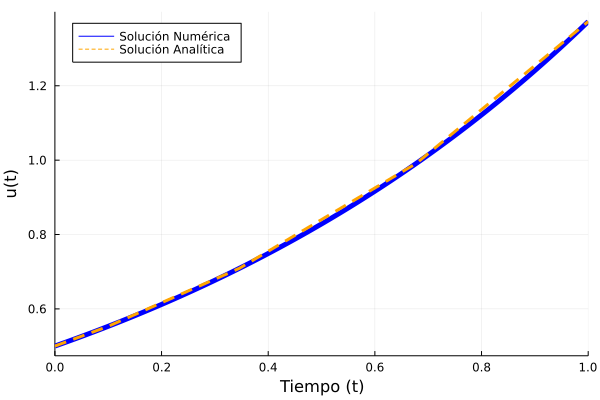

In [7]:
# Paso 3. Analizar la solución
plot(sol,
     seriestype=:line,
     title="",
     xlabel="Tiempo (t)",
     ylabel="u(t)",
     linewidth=5,
     color=:blue,
     label="Solución Numérica",
     legend=:topleft)

plot!(sol.t,
      t->0.5*exp(1.01t),
      lw=3,
      ls=:dash,
      c=:orange,
      label="Solución Analítica") # u(t) = u0*exp(αt)

## 1.5. Ejemplo 2

Se tiene la siguiente ODE:

$$
\frac{du}{dt} = f(u,p,t) = 5u - 3
$$

Donde:
- $u$ es la variable de estado actual
- $p$ es el parámetro que contiene las variables
- $t$ es el tiempo actual
- $u(t=0) = u_0 = 1$

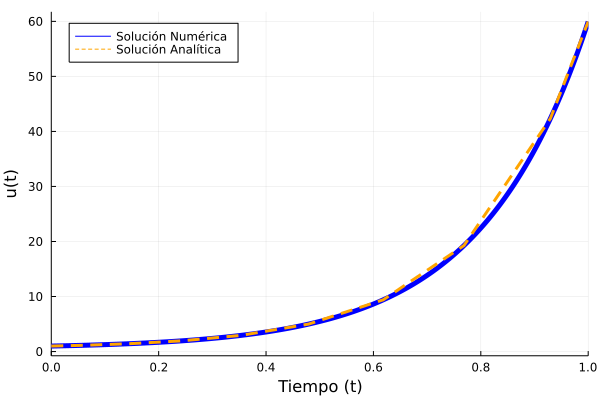

In [8]:
# Paso 1. Definir el problema
f!(u,p,t) = 5*u - 3
u0 = 1.0
tspan = (0.0, 1.0)

prob = ODEProblem(f!, u0, tspan)

# Paso 2. Resolver el problema
sol = solve(prob)

# Paso 3. Analizar la solución
plot(sol,
     seriestype=:line,
     title="",
     xlabel="Tiempo (t)",
     ylabel="u(t)",
     linewidth=5,
     color=:blue,
     label="Solución Numérica",
     legend=:topleft)

plot!(sol.t,
      t->(2/5)*exp(5*t)+(3/5),
      lw=3,
      ls=:dash,
      c=:orange,
      label="Solución Analítica") # u(t) = 2/5 exp(5t) + 3/5

## 1.6. Ejemplo 3

Se tiene la siguiente ODE:

$$
\frac{du}{dt} + u = \sin(t) + 3 \cos (2t)
$$

Donde:
- $u$ es la variable de estado actual
- $p$ es el parámetro que contiene las variables
- $t$ es el tiempo actual
- $u(t=0) = u_0 = 0$

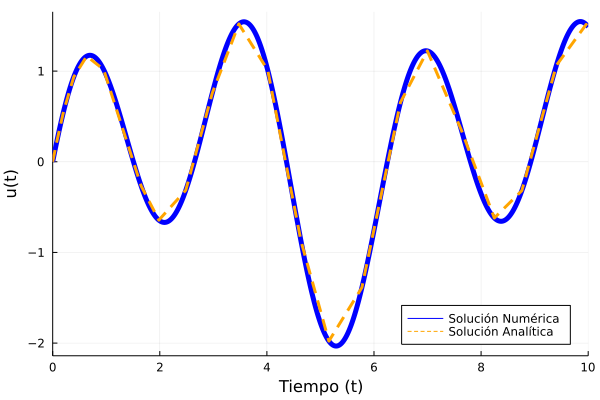

In [9]:
# Paso 1. Definir el problema
f!(u,p,t) = -u + sin(t) + 3*cos(2*t)
u0 = 0.0
tspan = (0.0, 10.0)

prob = ODEProblem(f!, u0, tspan)

# Paso 2. Resolver el problema
sol = solve(prob)

# Paso 3. Analizar la solución
plot(sol,
     seriestype=:line,
     title="",
     xlabel="Tiempo (t)",
     ylabel="u(t)",
     linewidth=5,
     color=:blue,
     label="Solución Numérica",
     legend=:bottomright)

an_sol(t) = (1.0/2.0)*sin(t) - (1.0/2.0)*cos(t) + (3.0/5.0)*cos(2.0*t) + (6.0/5.0)*sin(2.0*t) - (1.0/10.0)*exp(-t)

plot!(sol.t,
      an_sol.(sol.t),
      lw=3,
      ls=:dash,
      c=:orange,
      label="Solución Analítica")

## 1.7. Ejemplo 4

Se tiene el siguiente sistema de ecuaciones diferenciales (**[Ecuaciones de Lorenz](https://es.wikipedia.org/wiki/Atractor_de_Lorenz)**):

$$
\begin{cases}
  \frac{dx}{dt} = \sigma (y - x) \\ 
  \\
  \frac{dy}{dt} = x(\rho - z) - y \\
  \\
  \frac{dz}{dt} = xy - \beta z
\end{cases} 
$$

Donde:
- $\sigma = 10.0$
- $\rho = 28.0$
- $\beta = 8/3$
- $u$ es la variable de estado actual
- $p$ es el parámetro que contiene las variables
- $t$ es el tiempo actual
- $u(t=0) = u_0 = [x = 1.0; y = 0.0; z = 0.0]$

In [10]:
#= Paso 1. Definir el problema
du[1] -> dx/dt
du[2] -> dy/dt
du[3] -> dz/dt

u[1] -> x
u[2] -> y
u[3] -> z

p[1] -> σ
p[2] -> ρ
p[3] -> β
=#
function lorenz!(du,u,p,t)
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3]*u[3]
end

σ = 10.0
ρ = 28.0
β = 8/3

u0 = [1.0; 0.0; 0.0] # Vector columna
tspan = (0.0, 100.0)
p = [σ, ρ, β]

prob = ODEProblem(lorenz!, u0, tspan, p)

# Paso 2. Resolver el problema
sol = solve(prob)
sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1289-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624087100077666
   0.009058076582749423
   0.016956470605311864
   0.027689959227781235
   0.04185635103821218
   0.060240410627700816
   0.0836854113984534
   0.11336499269451543
   0.14862181409827
   0.18703978025370946
   ⋮
  99.3397852599881
  99.40421692882006
  99.4725041528708
  99.5412045549744
  99.6085310903818
  99.67192934036703
  99.72954041869967
  99.78291962638104
  99.84176034083528
  99.90666445162192
  99.98069072555015
 100.0
u: 1289-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591550149778, 0.08977063252764937, 0.0001438019170127846]
 [0.924204355043198, 0.242289149116772, 0.001046162539761

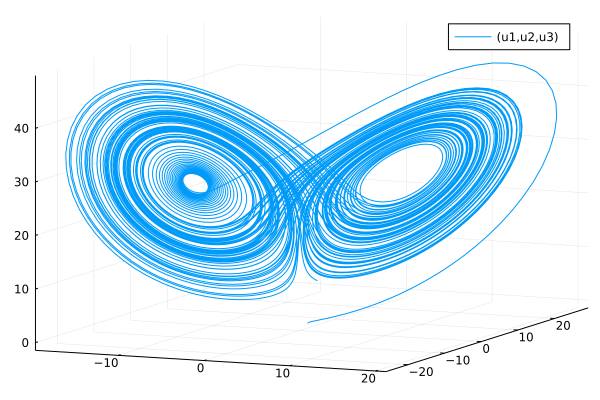

In [11]:
# Paso 3. Analizar la solución
plot(sol,vars=(1,2,3))

┌ Info: Saved animation to 
│   fn = /Users/nelsonsasa07/Documents/GitHub/ua-imec2001-hc-202210/content/week7/img/lorenz.gif
└ @ Plots /Users/nelsonsasa07/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/Users/nelsonsasa07/Documents/GitHub/ua-imec2001-hc-202210/content/week7/img/lorenz.gif")
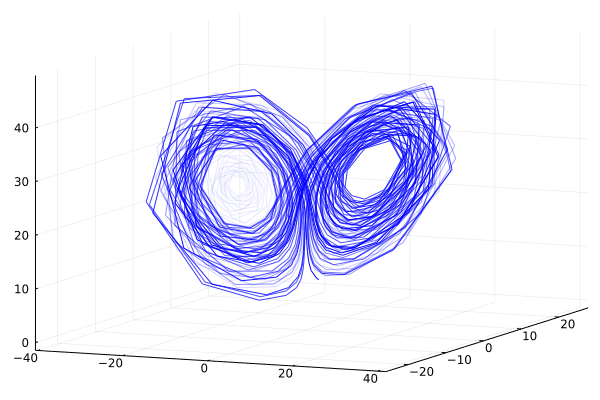

In [12]:
#=
Como es un comportamiento que cambia en el tiempo, podemos animar 
la respuesta con el macro @animate. Este código es tomado de DJ's 
Office Hour - Julia: 3D Animations with DifferentialEquations
https://www.youtube.com/watch?v=YKytJf9-qnI&t=368s
=#
n = length(sol.t)

@userplot LorenzPlot
@recipe function f(lp::LorenzPlot)
    x, y, z, i = lp.args
    n = length(x)
    inds = circshift(1:n, 1-i)
    seriesalpha --> range(0, 1, length=n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds], z[inds]
end

plt = plot3d(1, 
             xaxis=("x", (-30, 30)),
             yaxis=("y", (-30, 30)),
             zaxis=("z", (0, 60)),
             title="Atractor de Lorenz",
             marker=2,
             dpi=300)

anim = @animate for i in 1:10:n
    lorenzplot(sol[1,:], sol[2,:], sol[3,:], i, c=:blue) 
end

gif(anim, "./img/lorenz.gif", fps=60)

## 1.8. Ejemplo 5

Se tiene el siguiente sistema de ecuaciones diferenciales:

$$
\begin{cases}
  \frac{dx}{dt} = y - x \\ 
  \\
  \frac{dy}{dt} = 4x - y \\
\end{cases} 
$$

Donde:
- $u$ es la variable de estado actual
- $p$ es el parámetro que contiene las variables
- $t$ es el tiempo actual
- $u(t=0) = u_0 = [x = 2.0; y = 0.0]$

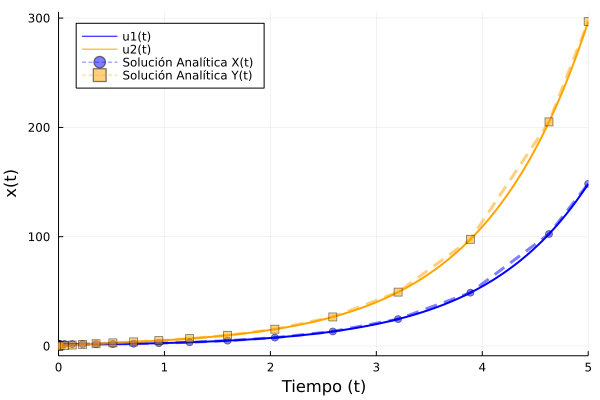

In [13]:
#= Paso 1. Definir el problema
du[1] -> dx/dt
du[2] -> dy/dt

u[1] -> x
u[2] -> y
=#
function f!(du,u,p,t)
    du[1] = u[2] - u[1]
    du[2] = 4*u[1] - u[2]
end

u0 = [2.0; 0.0] # Vector columna
tspan = (0.0, 5.0)

prob = ODEProblem(f!, u0, tspan)

# Paso 2. Resolver el problema
sol = solve(prob)

# Paso 3. Analizar la solución
plot(sol,
    linewidth=2,
    xlabel="Tiempo (t)",
    ylabel=["x(t)" "y(t)"],
    color=["blue" "orange"],
    legend=:topleft)

an_sol_x(t) = exp(t) + exp(-3.0 * t)
an_sol_y(t) = 2.0 * exp(t) - 2.0 * exp(-3.0 * t)

plot!(sol.t,
      an_sol_x.(sol.t),
      lw=3,
      ls=:dash,
      c=:blue,
      alpha=0.5,
      marker=:circle,
      label="Solución Analítica X(t)")

plot!(sol.t,
      an_sol_y.(sol.t),
      lw=3,
      ls=:dash,
      c=:orange,
      alpha=0.5,
      marker=:rect,
      label="Solución Analítica Y(t)")

## 1.9. Ejemplo 6

Se tiene el siguiente sistema de ecuaciones diferenciales (**[modelo de un péndulo simple](https://es.wikipedia.org/wiki/P%C3%A9ndulo_simple)**):

<img src='./img/pendulum.gif' width='250' height='250'/>

$$
\begin{cases}
  \frac{d \theta(t)}{dt} = \omega (t) \\ 
  \\
  \frac{d \omega(t)}{dt} = - \frac{3}{2} \frac{g}{l} \sin \theta(t) + \frac{3}{m l^2} M(t)\\
\end{cases} 
$$

Donde:
- $\theta$ es el ángulo con respecto a la vertical.
- $\omega$ es la velocidad angular.
- $g = 9.81$ es la aceleración de la gravedad.
- $l = 1$ es la longitud de la cuerda.
- $m = 1$ es la masa.
- $M$ es el torque externo (e.g., viento).
- $u$ es la variable de estado actual
- $p$ es el parámetro que contiene las variables
- $t$ es el tiempo actual
- $u(t=0) = u_0 = [\theta_0 = 0.01; \omega_0 = 0.0]$

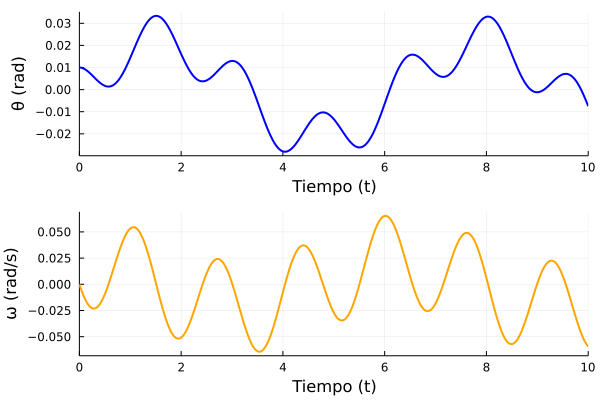

In [14]:
#= Paso 1. Definir el problema
du[1] -> dx/dt
du[2] -> dy/dt

u[1] -> θ
u[2] -> ω
=#
function pendulum!(du,u,p,t)
    du[1] = u[2] # θ'(t) = ω(t)
    du[2] = (-3g/(2l))*sin(u[1]) + (3/(m*l^2))*p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

l = 1.0 # longitud [m]
m = 1.0 # masa [kg]
g = 9.81 # aceleración de la gravedad [m/s²]

θ₀ = 0.01 # ángulo inicial [rad]
ω₀ = 0.0 # velocidad angular inicial [rad/s]

u0 = [θ₀, ω₀]
tspan = (0.0, 10.0)

M = t->0.1*sin(t) # Torque externo [Nm]

prob = ODEProblem(pendulum!, u0, tspan, M)

# Paso 2. Resolver el problema
sol = solve(prob)

# Paso 3. Analizar la solución
plot(sol,
    linewidth=2,
    xlabel="Tiempo (t)",
    ylabel=["θ (rad)" "ω (rad/s)"],
    color=["blue" "orange"],
    legend=false,
    layout=(2,1))

Observe que el torque externo `M` es variable en el tiempo y se introduce como un parámetro en la función `pendulum!`. Como principio general, los parámetros pueden ser de cualquier tipo, aquí especificamos `M` es variable en el tiempo y se representa mediante una función, que se expresa agregando la dependencia del tiempo `(t)` al nombre del parámetro.

Note también que, en contraste con el parámetro que varía con el tiempo, el vector de variables de estado `u0`, que generalmente también varía con el tiempo, siempre se usa sin la dependencia explícita del tiempo `(t)`.

## 1.10. Ejemplo 7

Se tiene la siguiente ODE de **segundo grado**:

$$
\frac{d^2u}{dt^2} + \frac{du}{dt} + 2x = 0
$$

Donde:
- $du$ es la derivada de la variable de estado actual
- $u$ es la variable de estado actual
- $p$ es el parámetro que contiene las variables
- $t$ es el tiempo actual
- $u(t=0) = u_0 = 1$
- $\frac{du}{dt}(t=0) = du_0 = 0$

In [15]:
# Paso 1. Definir el problema
f!(du,u,p,t) = -du[1] - 2u

u0 = 1.0
du0 = 0.0
tspan = (0.0, 12.0)

prob = SecondOrderODEProblem(f!, du0, u0, tspan)

# Paso 2. Resolver el problema
sol = solve(prob)
sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 29-element Vector{Float64}:
  0.0
  0.0004995004995004996
  0.005494505494505496
  0.055444555444555454
  0.1935386865944361
  0.40231884724940425
  0.6463794650850391
  0.9449118342538416
  1.281182731340441
  1.6600907216170095
  2.0765204342831622
  2.5311199758282914
  2.997167743750246
  ⋮
  5.627372104157016
  6.197358162980459
  6.748586335752862
  7.3433820938008125
  7.904407116519429
  8.506327561016553
  9.07295008302292
  9.684064407437136
 10.264179362665876
 10.882405964040503
 11.464923412769402
 12.0
u: 29-element Vector{ArrayPartition{Float64, Tuple{Float64, Float64}}}:
 (0.0, 1.0)
 (-0.0009987514567256436, 0.9999997505407981)
 (-0.010958766333860302, 0.999969865777362)
 (-0.10776055152852235, 0.996983476676882)
 (-0.3475492043158013, 0.9650627583895658)
 (-0.627390605379234, 0.861517181508266)
 (-0.825812536996557, 0.6814046112829252)
 (-0.8945094721383344, 0.42022102323343663)
 (-0.79059679

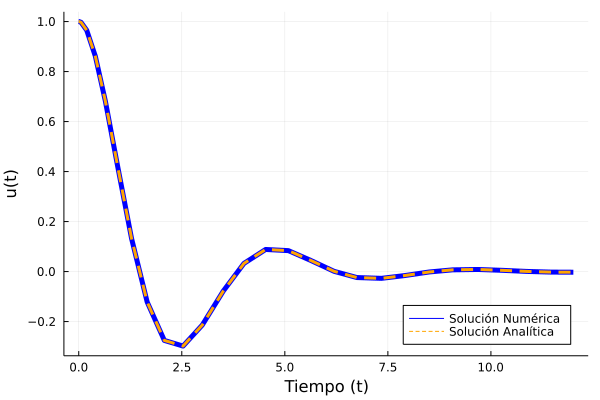

In [16]:
# Paso 3. Analizar la solución
du_sol = [u[2] for u in sol.u]

plot(sol.t,
     du_sol,
     seriestype=:line,
     title="",
     xlabel="Tiempo (t)",
     ylabel="u(t)",
     linewidth=5,
     color=:blue,
     label="Solución Numérica",
     legend=:bottomright)

an_sol(t) = exp(-t/2.0) * (cos(sqrt(7.0) * t / 2.0) + sin(sqrt(7.0) * t / 2.0)/sqrt(7.0))

plot!(sol.t,
      an_sol.(sol.t),
      lw=3,
      ls=:dash,
      c=:orange,
      label="Solución Analítica")